In [55]:
import pandas as pd #untuk memuat kumpulan data ke dalam DataFrame
import seaborn as sns #untuk visualisasi data dan untuk melakukan analisis data eksplorasi (EDA)
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split #untuk membagi kumpulan data menjadi subset pelatihan dan pengujian
from sklearn.tree import DecisionTreeClassifier #machine learning algorithms yang akan digunakan untuk klasifikasi
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #metrik untuk mengevaluasi kinerja model
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [56]:
# untuk load kumpulan data dari URL web menggunakan pd.read_csv(). Ini akan membaca kumpulan data ke dalam pandas DataFrame
url = "https://raw.githubusercontent.com/tsalisacamila/Data-Mining/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)

In [57]:
df.sample(5)  #menampilkan 5 data secara acak

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
119,4,99,76,15,51,23.2,0.223,21,0
752,3,108,62,24,0,26.0,0.223,25,0
588,3,176,86,27,156,33.3,1.154,52,1
544,1,88,78,29,76,32.0,0.365,29,0
540,8,100,74,40,215,39.4,0.661,43,1


In [58]:
df.info() #menampilkan ringkasan informasi tenatang DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
df.describe() #membrikan ringkasan statistik deskriptif dari kolom numerik data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


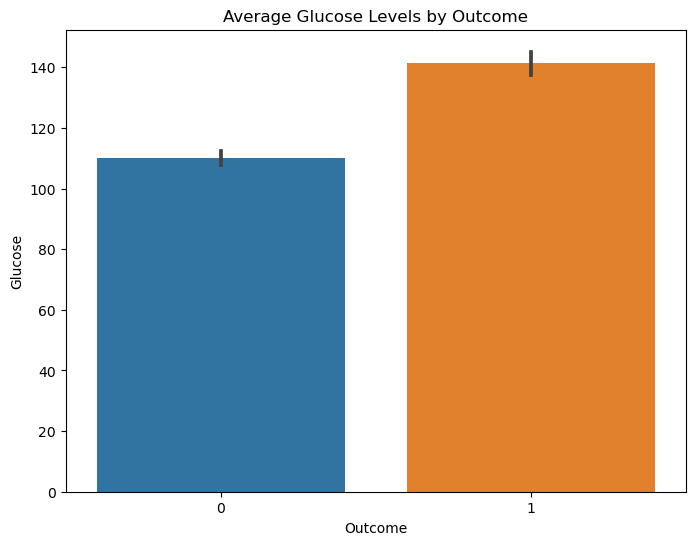

In [60]:
# untuk mengecek distribusi variabel target 
plt.figure(figsize=(8,6))
sns.barplot(x='Outcome', y='Glucose', data=df)
plt.title('Average Glucose Levels by Outcome')
plt.show()


In [61]:
# membersihkan data, jika output suda sesuai yaitu angka 0, maka menandakan bahwa tidak aada nilai kosong yang tersisa
import numpy as np
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
df.fillna(df.median(), inplace=True)
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


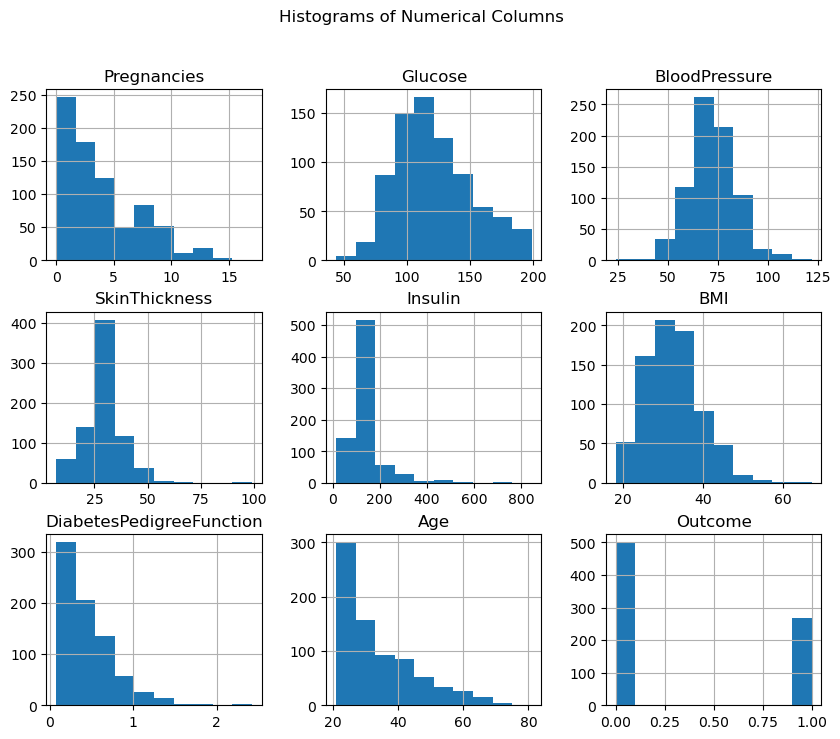

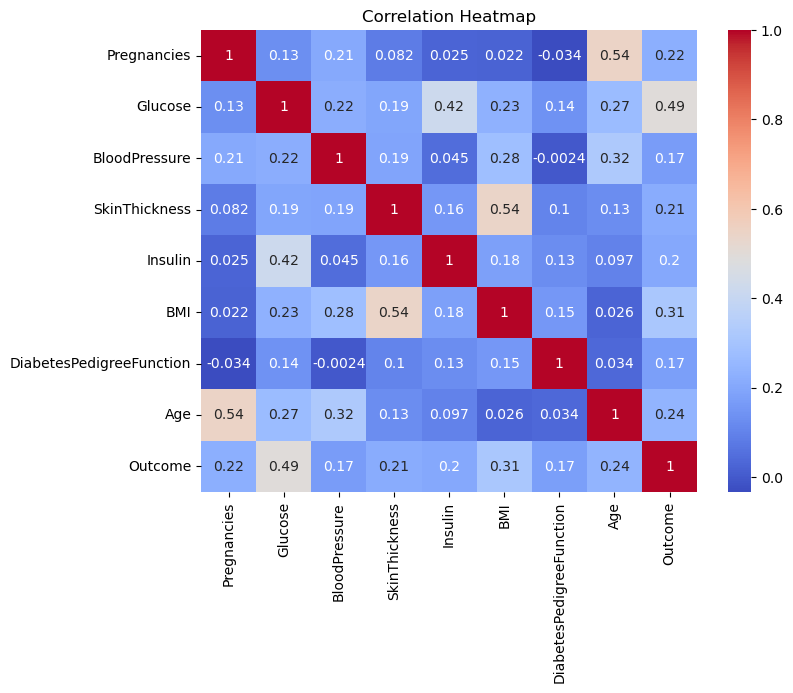

In [62]:
# melakukan visualisasi dan analisis untuk lebih memahami data, melalui histrogram dan heatmap
# exploratory EDA
df.hist(bins=10, figsize=(10, 8))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [63]:
#split data
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
X_train.shape, X_test.shape #menunjukan jumlah baris dan kolom

((614, 8), (154, 8))

In [65]:
# Decision Tree Classifier, menggunakan entropy sebagai pembagian dan mengevaluasi performanya
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, y_pred_dt))



Decision Tree Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [66]:
# Random forest clasifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [67]:
#naive bayes classifier, menggunakan Gaussian Naive Bayes yang cocok untuk data numerik
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("\nNaive Bayes Accuracy:", nb_accuracy)
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



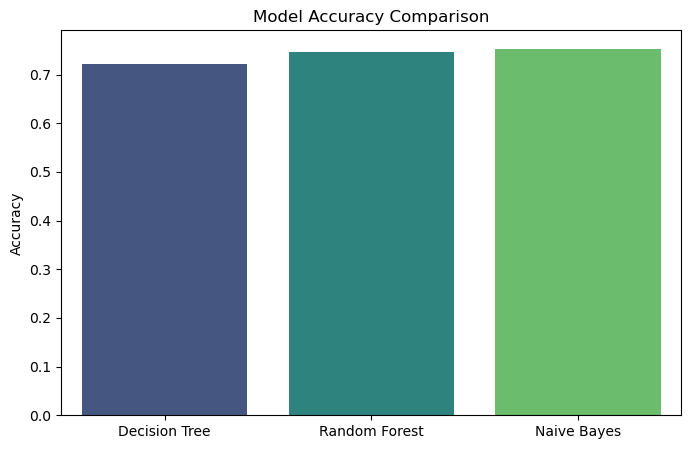

In [68]:
model_names = ['Decision Tree', 'Random Forest', 'Naive Bayes']
accuracies = [dt_accuracy, rf_accuracy, nb_accuracy]

# Membuat plot perbandingan akurasi model
plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

#kode ini menghasilkan bar chart yang menunjukan perbandingan akurasi untuk ketiga model yaitu:
# Decision Tree, Random Forest, Naive Bayes
# dari visulisasi data ini, Naive Bayes memiliki nilai yang paling tinggi dibandingkan kedua visualisasi data lainnya. 